# Data Analysis: Self-Paced Reading Task


## Research Questions and Predictions


**Research questions**:

1. Are object relative clauses (ORs) parsed slower than subject relative clauses (SRs) by adult Spanish-English bilinguals?

2. If so, does number mismatch between the two determiner phrases (DPs) facilitate their comprehension?

**Predictions**:

1. Adult Spanish-English bilinguals will show shorter reaction times (RTs) in SRs than in ORs.

2. Number mismatch between the two DPs will result in shorter RTs in ORs than number match.


## RT Data Analysis


This is a step by step guide on how the data collected by the self-paced reading task has been analyzed.


### 1. Library Loading


The following libraries are imported:

1. `tidyverse`, for cleaner data wrangling functions and access to other included packages, such as `ggplot2`.
2. `ggthemes`, to access the theme `theme_calc()`.
3. `lmerTest`, for more powerful mixed regression models.
4. `gt`, for table creation functions.
5. `broom.mixed`, for converting model output into data frames.


In [88]:
library(tidyverse)
library(lmerTest)
library(ggthemes)
library(gt)
library(broom.mixed)


### 2. Importing and Processing Data


#### Importing Questionnaire Data


In [89]:
df_part <- read.csv("./data/part_data.csv")
df_part$part_name <- NULL
df_part$part_mail <- NULL
head(df_part)


,X...part_id,part_experiment,part_age,part_lang,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_eng_exp,part_eng_pro,part_spa_exp,part_spa_pro,part_eng_onset_method,part_eng_onset_time,Status,part_date
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>
1,33,TFG,18 - 25,"Catalan, English, Spanish",No,Yes,C1 (Advanced),< 1h,< 1h,> 5h,3h - 5h,> 5h,> 5h,At home,0,Accepted,
2,22,Pilot,26 - 30,"Catalan, English, Spanish",No,No,B2 (First),< 1h,< 1h,1h - 3h,1h - 3h,> 5h,> 5h,At school,5,Accepted,
3,21,Pilot,26 - 30,"Catalan, Spanish",No,No,C2 (Proficiency),1h - 3h,1h - 3h,> 5h,> 5h,> 5h,> 5h,At school,6,Accepted,
4,20,Pilot,18 - 25,"Catalan, Spanish",No,No,B2 (First),< 1h,< 1h,< 1h,< 1h,> 5h,> 5h,At school,8,Accepted,
5,26,Practicum,18 - 25,"Catalan, Spanish",No,Yes,C1 (Advanced),> 5h,> 5h,1h - 3h,< 1h,3h - 5h,3h - 5h,At school,4,Scheduled,"May 17, 2025 10:00 (GMT+2)"
6,27,Pilot,18 - 25,"Catalan, Spanish",No,No,C2 (Proficiency),> 5h,> 5h,1h - 3h,1h - 3h,> 5h,> 5h,At school,3,Scheduled,


#### Cleaning Questionnaire Data


In [90]:
df_part <- df_part %>%
    select(part_experiment, X...part_id, part_lang, part_impaired., part_abroad, part_certificate, part_cat_exp, part_cat_pro, part_spa_exp, part_spa_pro, part_eng_exp, part_eng_pro, part_eng_onset_time) %>%
    mutate(
        part_experiment = as.factor(part_experiment),
        X...part_id = as.factor(X...part_id),
        part_lang = as.factor(part_lang),
        part_impaired. = as.factor(part_impaired.),
        part_abroad = as.factor(part_abroad),
        part_certificate = as.factor(part_certificate),
        part_cat_exp = as.factor(part_cat_exp),
        part_cat_pro = as.factor(part_cat_pro),
        part_spa_exp = as.factor(part_spa_exp),
        part_spa_pro = as.factor(part_cat_pro),
        part_eng_exp = as.factor(part_eng_exp),
        part_eng_pro = as.factor(part_eng_pro)
    ) %>%
    filter(part_experiment == "TFG") %>%
    rename(part_id = X...part_id) %>%
    droplevels()

df_part$part_experiment <- NULL

head(df_part, 10)


,part_id,part_lang,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_spa_exp,part_spa_pro,part_eng_exp,part_eng_pro,part_eng_onset_time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,33,"Catalan, English, Spanish",No,Yes,C1 (Advanced),< 1h,< 1h,> 5h,< 1h,> 5h,3h - 5h,0
2,32,"Catalan, Spanish",No,No,C1 (Advanced),> 5h,> 5h,3h - 5h,> 5h,1h - 3h,1h - 3h,6
3,31,"Catalan, Spanish",No,No,C1 (Advanced),1h - 3h,> 5h,3h - 5h,> 5h,1h - 3h,< 1h,10
4,29,Spanish,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6


#### Importing Task Data


First, an example is imported to inspect the data set's variables and their data types.


In [91]:
df_example <- read.csv("./data/32.csv")
head(df_example, 10)


,rt,response,trial_type,trial_index,plugin_version,time_elapsed,part_id,task,item_number,item_type,segment,clause_type,number,stimulus,question,correct_answer,part_answer,correct
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2322825,"{""part_id"":""32""}",survey-html-form,0,2.0.0,2325458,32,,,,,,,,,,,NA
2,1536,,html-keyboard-response,2,2.0.0,2368979,32,item,null,pr_item,s0,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | _______ | _______ | ____</p>",,,,NA
3,1222,,html-keyboard-response,3,2.0.0,2370201,32,item,null,pr_item,s1,sr,ss,"<p class=""trial-stimulus"">The cat | ____ | _______ | _______ | ____</p>",,,,NA
4,1408,,html-keyboard-response,4,2.0.0,2371610,32,item,null,pr_item,s2,sr,ss,"<p class=""trial-stimulus"">_______ | that | _______ | _______ | ____</p>",,,,NA
5,1249,,html-keyboard-response,5,2.0.0,2372859,32,item,null,pr_item,s3,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | watches | _______ | ____</p>",,,,NA
6,1102,,html-keyboard-response,6,2.0.0,2373964,32,item,null,pr_item,s4,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | _______ | the dog | ____</p>",,,,NA
7,2405,,html-keyboard-response,7,2.0.0,2376370,32,item,null,pr_item,s5,sr,ss,"<p class=""trial-stimulus"">_______ | ____ | _______ | _______ | eats</p>",false,,,NA
8,1727,,html-keyboard-response,9,2.0.0,2378602,32,item,null,pr_item,s0,or,ss,"<p class=""trial-stimulus"">_________ | ____ | _________ | _____ | ______</p>",,,,NA
9,1111,,html-keyboard-response,10,2.0.0,2379714,32,item,null,pr_item,s1,or,ss,"<p class=""trial-stimulus"">The horse | ____ | _________ | _____ | ______</p>",,,,NA


Having done this, now we know which are the specific names of each variable, which ones are of interest and the data type of their values.

We can now proceed to creating the full data set will all our participants' data. This is done by importing them and passing them through the `reduce()` function, which combines all the CSV files into a single data set. The keyword `rbind` makes sure that the individual data sets are merged as additional rows.

Note that only the following columns are selected:

- `part_id`, for the participants' ID number.
- `task`, for the kind of trial, item or question.
- `item_number`, for the items' ID number.
- `item_type`, for the type of item, experimental, practice or filler.
- `clause_type`, for the type fo clause, OR or SR.
- `number`, for the number condition, singular-singular (SS), plural-plural (PP), singular-plural (SP) or plural-singular (PS).
- `segment`, for the segment ID.
- `rt`, for the RTs.
- `correct`, for the accuracy of their responses to question tasks.


In [92]:
df_raw <- reduce(
    list(
        select(read.csv("./data/29.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/31.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct),
        select(read.csv("./data/32.csv"), part_id, task, item_number, item_type, clause_type, number, segment, rt, correct)
    ),
    rbind
)
head(df_raw, 10)


,part_id,task,item_number,item_type,clause_type,number,segment,rt,correct
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,29,,,,,,,2413859,NA
2,29,item,null,pr_item,sr,ss,s0,2521,NA
3,29,item,null,pr_item,sr,ss,s1,405,NA
4,29,item,null,pr_item,sr,ss,s2,368,NA
5,29,item,null,pr_item,sr,ss,s3,350,NA
6,29,item,null,pr_item,sr,ss,s4,382,NA
7,29,item,null,pr_item,sr,ss,s5,376,NA
8,29,item,null,pr_item,or,ss,s0,1004,NA
9,29,item,null,pr_item,or,ss,s1,414,NA


#### Cleaning Task Data


After that, the data is cleaned.

Firstly, the rows are ordered by the participants' ID number with the `order()` function.

Secondly, the observations are filtered using the `filter()` function, keeping only those that involve experimental items and excluding question tasks.

Then, the function `mutate()` is used to transform the data types. `item_number` is transformed to numeric. The rest are transformed to factors.

Additionally, a new column `matching` is created which groups match and mismatch conditions.

Lastly, the `relocate()` function is used to make the `matching` column follow the `number` one.


In [93]:
df_clean <- df_raw %>%
    .[order(.$part_id), ] %>%
    filter(.$item_type == "exp_item" & .$task == "item" & segment != "s0") %>%
    mutate(
        item_number = as.numeric(item_number),
        task = as.factor(task),
        item_type = as.factor(item_type),
        clause_type = as.factor(clause_type),
        number = as.factor(number),
        matching = as.factor(ifelse(number == "ss" | number == "pp", "match", "mismatch")),
        segment = as.factor(segment),
        part_id = as.factor(part_id),
    ) %>%
    relocate(matching, .after = number) %>%
    droplevels()
head(df_clean, 10)


,part_id,task,item_number,item_type,clause_type,number,matching,segment,rt,correct
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,29,item,8,exp_item,or,pp,match,s1,719,NA
2,29,item,8,exp_item,or,pp,match,s2,548,NA
3,29,item,8,exp_item,or,pp,match,s3,800,NA
4,29,item,8,exp_item,or,pp,match,s4,1176,NA
5,29,item,8,exp_item,or,pp,match,s5,1303,NA
6,29,item,4,exp_item,or,sp,mismatch,s1,688,NA
7,29,item,4,exp_item,or,sp,mismatch,s2,607,NA
8,29,item,4,exp_item,or,sp,mismatch,s3,1071,NA
9,29,item,4,exp_item,or,sp,mismatch,s4,1832,NA


#### Normalizing


With the data looking like it should, now it is time to check for normal distribution. A plot is created that holds the data as it is.


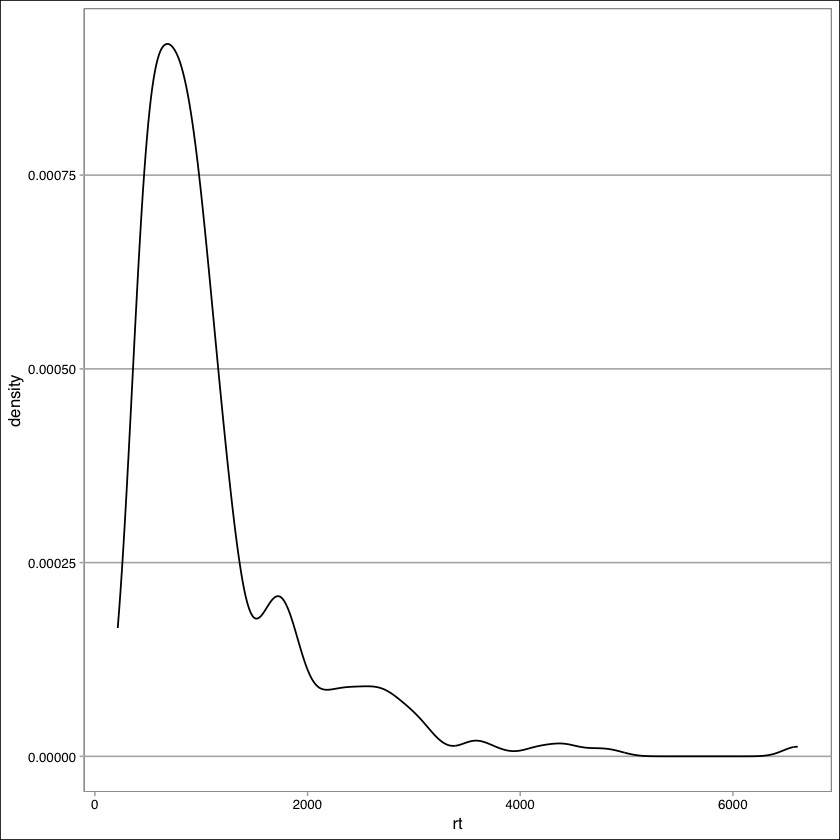

In [ ]:
skewed_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_density() +
    theme_calc()
skewed_plot


The first strategy to normalize the data is removing extreme values, or outliers, which might be causing the data to be left-skewed.


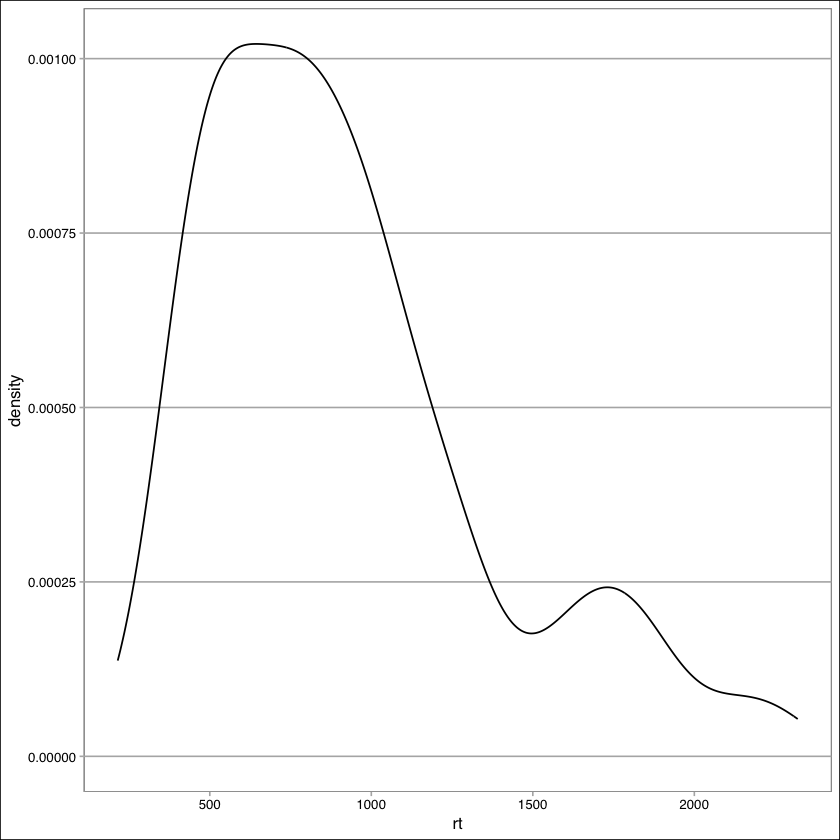

In [95]:
q1 <- quantile(df_clean$rt, 0.25)
q3 <- quantile(df_clean$rt, 0.75)
iqr <- q3 - q1
lower_limit <- q1 - iqr * 1.5
upper_limit <- q3 + iqr * 1.5

df_clean <- df_clean %>%
    filter(.$rt > lower_limit & .$rt < upper_limit)

no_outlier_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_density() +
    theme_calc()
no_outlier_plot


A second strategy that can be performed to further normalize the data is converting the continuos variable, RTs, into a logarithmic scale.


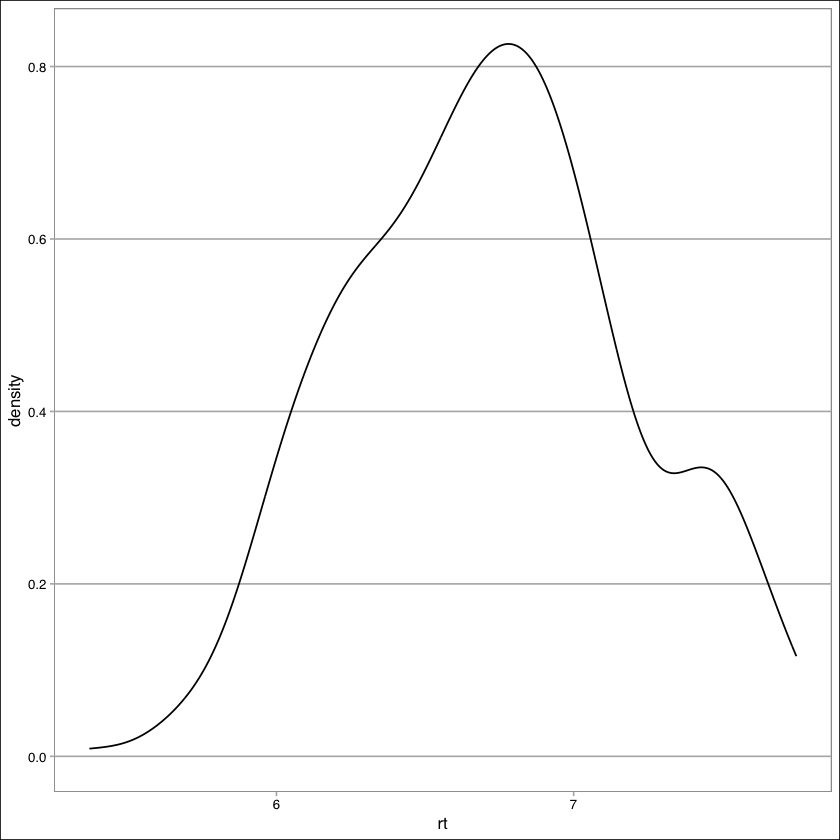

In [96]:
df_clean <- df_clean %>%
    mutate(rt = log(rt))

normal_plot <- df_clean %>%
    ggplot(aes(x = rt)) +
    geom_density() +
    theme_calc()
normal_plot


#### Merging Experiment and Participant Data Sets


In [97]:
df_part$part_experiment <- NULL

df_merged <- merge(df_clean, df_part, by = "part_id")
head(df_merged, 10)


,part_id,task,item_number,item_type,clause_type,number,matching,segment,rt,correct,...,part_impaired.,part_abroad,part_certificate,part_cat_exp,part_cat_pro,part_spa_exp,part_spa_pro,part_eng_exp,part_eng_pro,part_eng_onset_time
,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,...,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>
1,29,item,8,exp_item,or,pp,match,s1,6.577861,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
2,29,item,8,exp_item,or,pp,match,s2,6.306275,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
3,29,item,8,exp_item,or,pp,match,s3,6.684612,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
4,29,item,8,exp_item,or,pp,match,s4,7.069874,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
5,29,item,8,exp_item,or,pp,match,s5,7.172425,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
6,29,item,4,exp_item,or,sp,mismatch,s1,6.533789,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
7,29,item,4,exp_item,or,sp,mismatch,s2,6.408529,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
8,29,item,4,exp_item,or,sp,mismatch,s3,6.976348,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6
9,29,item,4,exp_item,or,sp,mismatch,s4,7.513164,NA,...,No,No,C2 (Proficiency),< 1h,< 1h,> 5h,< 1h,> 5h,1h - 3h,6


### 3. Linear Regression Models


Three regression models are created using the `lmer()` function.

- `lm_clause` checks for the correlation between RTs and clause type. Significantly higher RTs are expected for ORs.
- `lm_matching` checks for the interaction between clause type and matching on RTs. A significant effect of mismatch condition is expected in ORs but not in SRs.
- `lm_segment` checks for the interaction between clause type and segment on RTs. A significant effect of clause type is expected in segments 3, 4 and 5. The rest are filtered out.


#### RQ1: Clause Type


In [98]:
lm_clause <- lmer(data = df_merged, rt ~ clause_type + (1 | part_eng_pro) + (1 | part_eng_exp) + (1 | part_eng_onset_time))
summary(lm_clause)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type + (1 | part_eng_pro) + (1 | part_eng_exp) +  
    (1 | part_eng_onset_time)
   Data: df_merged

REML criterion at convergence: 544.4

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.55242 -0.70771 -0.09349  0.59322  2.59499 

Random effects:
 Groups              Name        Variance  Std.Dev.
 part_eng_pro        (Intercept) 0.0193048 0.13894 
 part_eng_exp        (Intercept) 0.0597353 0.24441 
 part_eng_onset_time (Intercept) 0.0002369 0.01539 
 Residual                        0.1970975 0.44396 
Number of obs: 436, groups:  
part_eng_pro, 2; part_eng_exp, 2; part_eng_onset_time, 2

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)     6.68918    0.20200   1.55854  33.115  0.00331 **
clause_typesr  -0.11003    0.04259 431.92444  -2.584  0.01011 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



In [99]:
lm_segment <- lmer(data = df_merged, rt ~ clause_type * segment + (1 | part_eng_pro) + (1 | part_eng_exp))
summary(lm_segment)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type * segment + (1 | part_eng_pro) + (1 | part_eng_exp)
   Data: df_merged

REML criterion at convergence: 476.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2631 -0.7168 -0.1157  0.5851  3.1114 

Random effects:
 Groups       Name        Variance Std.Dev.
 part_eng_pro (Intercept) 0.02116  0.1455  
 part_eng_exp (Intercept) 0.06356  0.2521  
 Residual                 0.16115  0.4014  
Number of obs: 436, groups:  part_eng_pro, 2; part_eng_exp, 2

Fixed effects:
                         Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)               6.49148    0.21423   1.76760  30.301  0.00208 ** 
clause_typesr            -0.14156    0.08194 423.93915  -1.728  0.08480 .  
segments2                -0.03174    0.08238 423.94079  -0.385  0.70021    
segments3                 0.36285    0.08283 423.94084   4.381 1.49e-05 ***
segments4                 

#### RQ2: Mismatch and ORs


In [100]:
lm_matching <- lmer(data = df_merged, rt ~ clause_type * matching + (1 | part_eng_exp) + (1 | part_eng_pro))
summary(lm_matching)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: rt ~ clause_type * matching + (1 | part_eng_exp) + (1 | part_eng_pro)
   Data: df_merged

REML criterion at convergence: 547.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6307 -0.7257 -0.0768  0.5989  2.6923 

Random effects:
 Groups       Name        Variance Std.Dev.
 part_eng_exp (Intercept) 0.06102  0.2470  
 part_eng_pro (Intercept) 0.01994  0.1412  
 Residual                 0.19599  0.4427  
Number of obs: 436, groups:  part_eng_exp, 2; part_eng_pro, 2

Fixed effects:
                                Estimate Std. Error        df t value Pr(>|t|)
(Intercept)                      6.74174    0.20626   1.62804  32.686  0.00275
clause_typesr                   -0.19799    0.06017 429.94461  -3.290  0.00108
matchingmismatch                -0.10812    0.06173 429.96959  -1.751  0.08059
clause_typesr:matchingmismatch   0.17577    0.08498 429.95006   2.068  0.03920
          

### 4. Plotting Data


#### RQ1: Clause Type


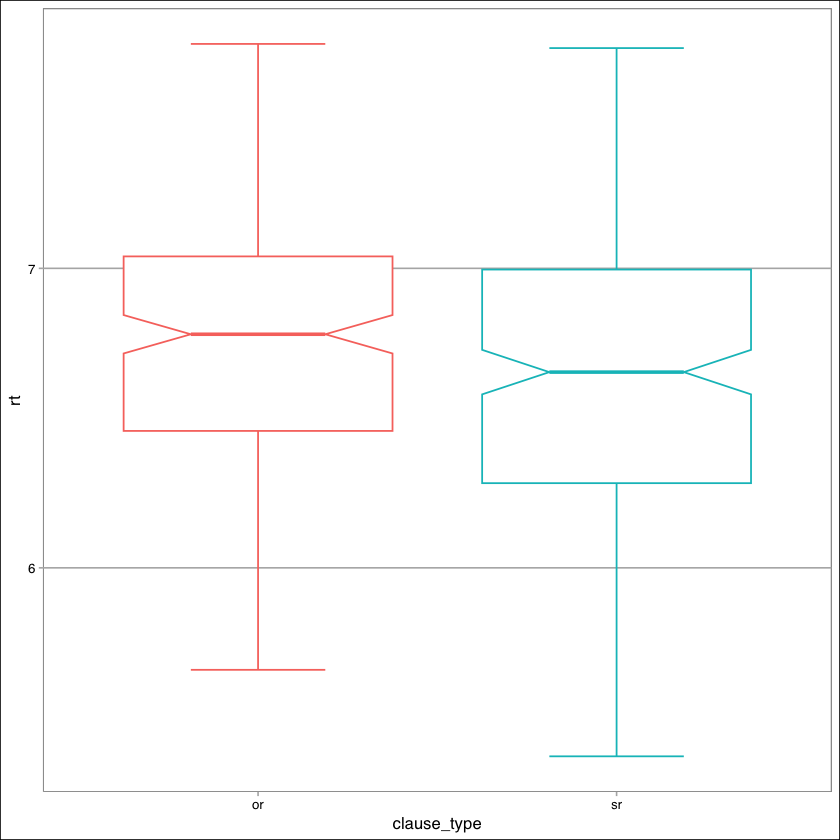

In [101]:
lm_clause_plot <- df_clean %>%
    ggplot(aes(y = rt, x = clause_type, color = clause_type)) +
    geom_boxplot(show.legend = FALSE, staplewidth = 0.5, notch = TRUE) +
    theme_calc()
lm_clause_plot


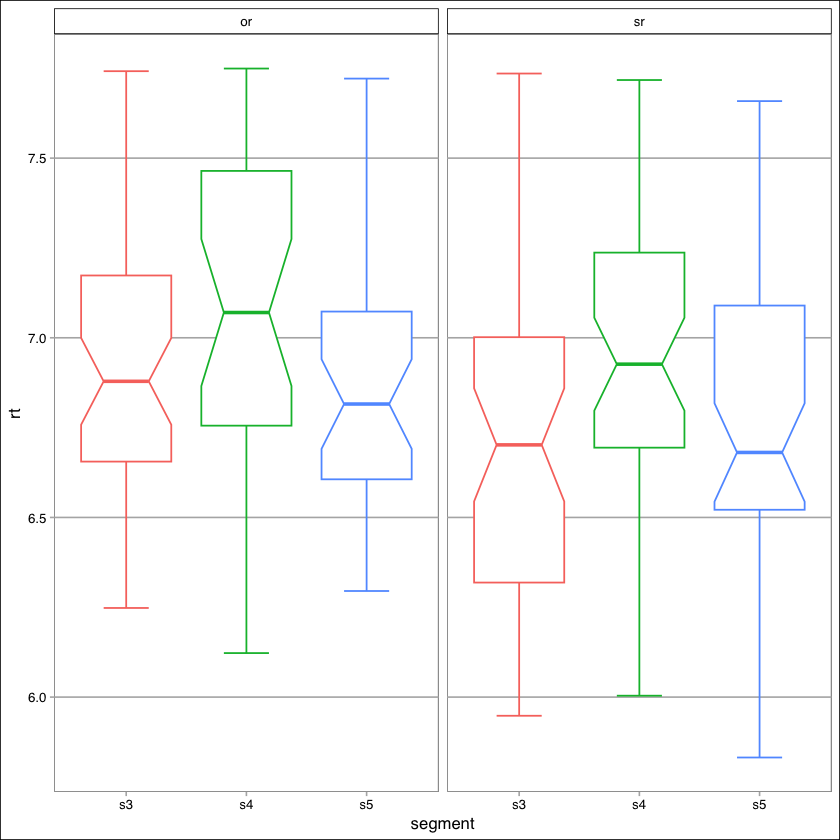

In [102]:
lm_segment_plot <- df_clean %>%
    filter(segment %in% c("s3", "s4", "s5")) %>%
    ggplot(aes(y = rt, x = segment, color = segment)) +
    facet_wrap(~clause_type) +
    geom_boxplot(notch = TRUE, staplewidth = 0.5, show.legend = FALSE) + # Change notch to TRUE
    theme_calc()
lm_segment_plot


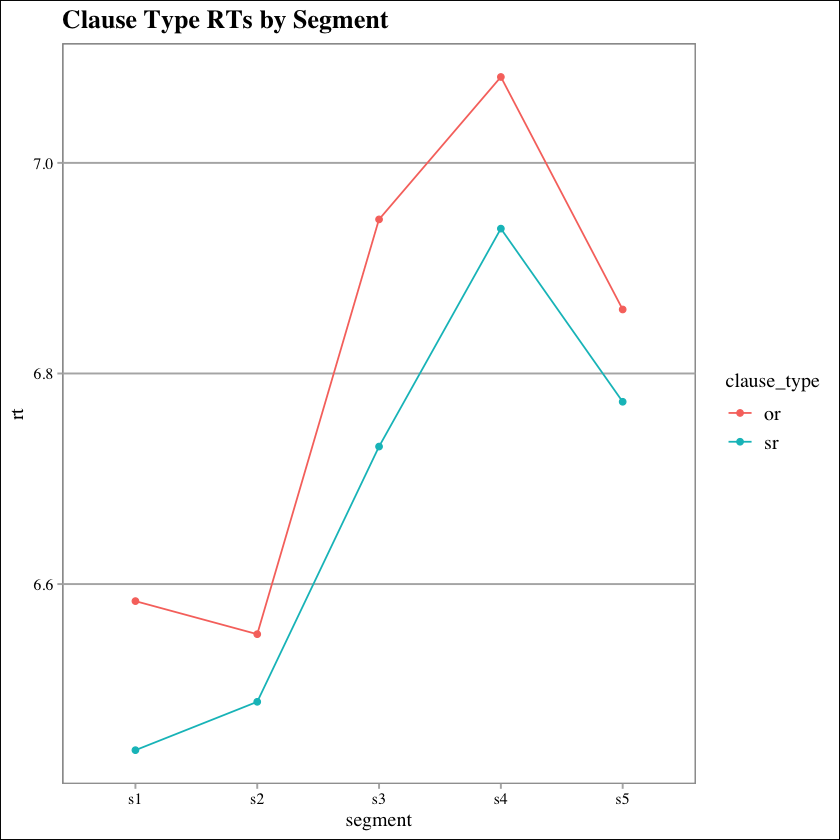

In [120]:
lm_segment_plot2 <- df_clean %>%
    ggplot(aes(y = rt, x = segment, color = clause_type, group = clause_type)) +
    stat_summary(fun = mean, geom = "line") +
    stat_summary(fun = mean, geom = "point") +
    theme_calc(base_size = 12, base_family = "Times") +
    labs(
        title = "Clause Type RTs by Segment"
    ) +
    theme(
        plot.title = element_text(face = "bold")
    )
lm_segment_plot2

ggsave(filename = "test.svg", path = "plots/", height = 5, width = 10, dpi = 600)


#### RQ2: Mismatch and ORs


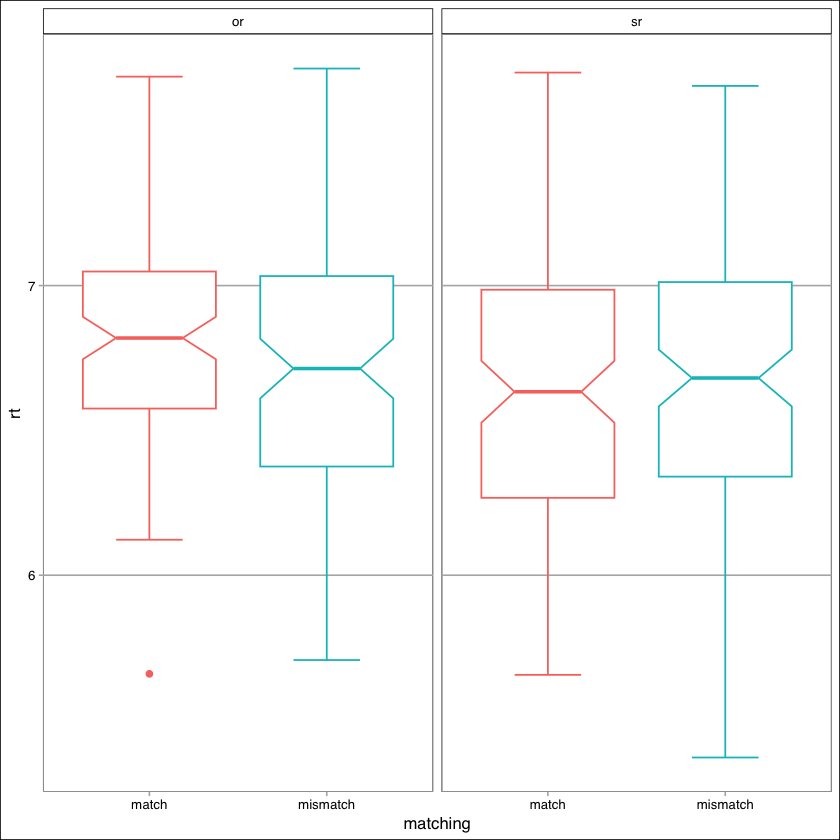

In [104]:
lm_matching_plot <- df_clean %>%
    ggplot(aes(y = rt, x = matching, color = matching, group = matching)) +
    geom_boxplot(notch = TRUE, staplewidth = 0.5, show.legend = FALSE) +
    facet_wrap(df_clean$clause_type) +
    theme_calc()
lm_matching_plot


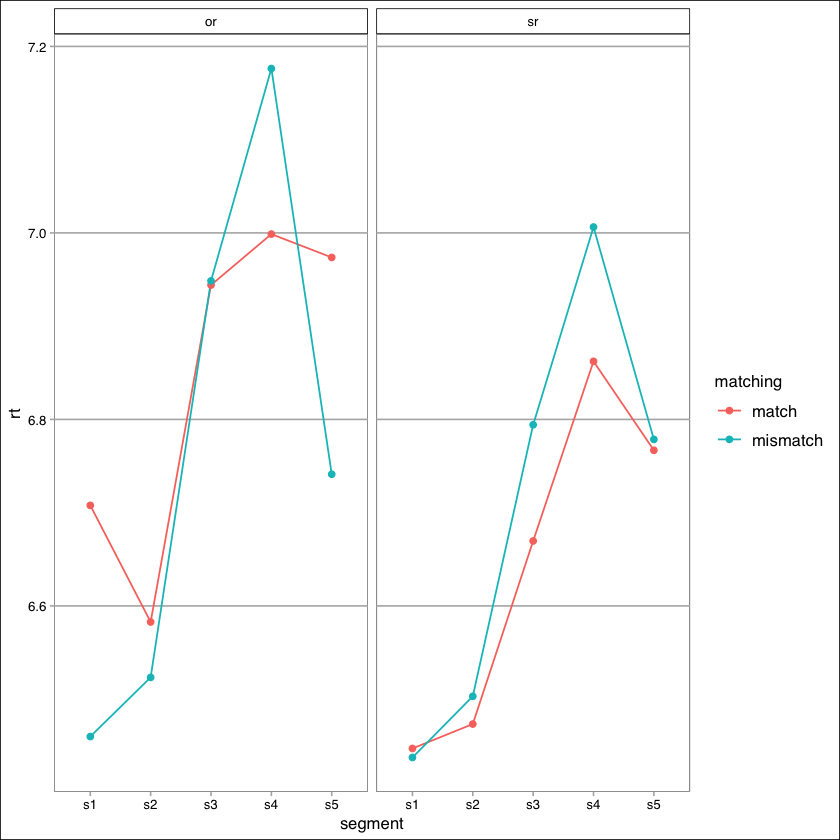

In [105]:
lm_matching_plot2 <- df_clean %>%
    ggplot(aes(y = rt, x = segment, color = matching, group = matching)) +
    stat_summary(fun = mean, geom = "line") +
    stat_summary(fun = mean, geom = "point") +
    facet_wrap(df_clean$clause_type) +
    theme_calc()
lm_matching_plot2
